<a href="https://colab.research.google.com/github/dhanush46infotech-debug/food_data/blob/main/FOODDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**S DHANUSH KUMAR B.E,EIE**

**AI BATCH**

**FOOD DATASET - MILESTONE PROJECT**

**PIP PACKAGES INSTALLER**


In [66]:
# Cell 1 - Install required libraries
!pip install pandas numpy matplotlib seaborn scipy


**IMPORT LIBRARIES**

In [67]:
import pandas as pd # Data Manipulation
import numpy as np  #Numerical Computations
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
import scipy.stats as stats #Statistical Analysis
from IPython.display import display #for displaying dataframes
import re #Regular Expressions
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**DATA UNDERSTANDING**


**LOAD DATASET**


In [68]:
food_df = pd.read_csv('/content/indian_food.csv', header=0)
food_df.columns = food_df.columns.str.replace(' ', '_').str.lower()

**Dataset Summary (Size, Structure, Initial Findings)**

In [69]:
#SIZE
print( "Dataset Size (Rows, Columns):")
print(food_df.shape)

Dataset Size (Rows, Columns):
(163, 7)


In [70]:
#Structure
print("Dataset Structure (Column Names & Dtypes):")
print(food_df.dtypes)

Dataset Structure (Column Names & Dtypes):
food_name          object
ingredients        object
veg/non_veg        object
cook_time         float64
flavor_profile     object
course             object
state              object
dtype: object


**INITIAL FINDINGS**

In [71]:
#Display first 5 rows [0->4]
print("Initial Data Preview (head):")
food_df.head()

Initial Data Preview (head):


,food_name,ingredients,veg/non_veg,cook_time,flavor_profile,course,state
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,25.0,sweet,dessert,West Bengal
1,Boondi,"Gram flour, ghee, sugar",vegetarian,30.0,sweet,dessert,Rajasthan
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60.0,sweet,dessert,Punjab
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30.0,sweet,dessert,Rajasthan
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,40.0,sweet,dessert,West Bengal


In [72]:
food_df.iloc[0:5]

,food_name,ingredients,veg/non_veg,cook_time,flavor_profile,course,state
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,25.0,sweet,dessert,West Bengal
1,Boondi,"Gram flour, ghee, sugar",vegetarian,30.0,sweet,dessert,Rajasthan
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60.0,sweet,dessert,Punjab
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30.0,sweet,dessert,Rajasthan
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,40.0,sweet,dessert,West Bengal


In [73]:
food_df.columns

Index(['food_name', 'ingredients', 'veg/non_veg', 'cook_time',
       'flavor_profile', 'course', 'state'],
      dtype='object')

In [74]:
#to Get information of data
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   food_name       159 non-null    object 
 1   ingredients     159 non-null    object 
 2   veg/non_veg     158 non-null    object 
 3   cook_time       154 non-null    float64
 4   flavor_profile  148 non-null    object 
 5   course          159 non-null    object 
 6   state           140 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.0+ KB


**data.info() shows that the variables Food Name, Ingredients, Veg/Non veg, cook_time, flavor_profile, course, and state contain missing values.
<br>The dataset has 6 categorical variables (Food Name, Ingredients, Veg/Non veg, flavor_profile, course, state), all stored as object datatype.
<br>It has 1 numerical variable, cook_time, which is of datatype float64**

Missing Values Summary

In [75]:
# Missing values
print(food_df.isna().sum())

food_name          4
ingredients        4
veg/non_veg        5
cook_time          9
flavor_profile    15
course             4
state             23
dtype: int64


In [76]:
# Basic statistics (numeric columns only)
print(food_df.describe())


        cook_time
count  154.000000
mean    43.422078
std     58.973549
min      2.000000
25%     25.000000
50%     30.000000
75%     50.000000
max    720.000000


In [77]:
# Unique values in each column
print(food_df.nunique())

food_name         159
ingredients       157
veg/non_veg         2
cook_time          17
flavor_profile      3
course              4
state              22
dtype: int64


In [78]:
# Missing Values Calculation
food_df.isnull().sum()

,0
food_name,4
ingredients,4
veg/non_veg,5
cook_time,9
flavor_profile,15
course,4
state,23


In [79]:
# calculate the percentage of missing values in each column
(food_df.isnull().sum()/(len(food_df)))*100

,0
food_name,2.453988
ingredients,2.453988
veg/non_veg,3.067485
cook_time,5.521472
flavor_profile,9.202454
course,2.453988
state,14.110429


DUPLICATE FINDINGS

In [80]:

# Duplicate Records

# Count duplicates
duplicate_count = food_df.duplicated().sum()
print("Total Duplicate Rows:", duplicate_count)

# Display sample duplicates
if duplicate_count > 0:
    display(food_df[food_df.duplicated()].head())

# Remove duplicates
food_df = food_df.drop_duplicates()
print("\nDuplicates removed. New shape:", food_df.shape)


Total Duplicate Rows: 3


,food_name,ingredients,veg/non_veg,cook_time,flavor_profile,course,state
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Duplicates removed. New shape: (160, 7)


Detect Outliers (IQR Method)

In [81]:



num_cols = food_df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = food_df[col].quantile(0.25)
    Q3 = food_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = food_df[(food_df[col] < lower) | (food_df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


cook_time: 11 outliers


Outliers sample
normal cook time = 10 to 50 minutes
But your dataset has values like:
0
1
0
200
300
45
...


this values are known as outliers

In [82]:

# A2 - Remove outliers using IQR method (standard statistical approach)
col = 'cook_time'
series = food_df[col].dropna()

Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

clean_by_iqr = food_df[(food_df[col] >= lower) & (food_df[col] <= upper)].copy()

print(f"IQR lower = {lower:.2f}, upper = {upper:.2f}")
print("Original rows:", len(food_df))
print("After removing IQR outliers:", len(clean_by_iqr))

# Show removed outliers
removed_iqr = food_df[(food_df[col] < lower) | (food_df[col] > upper)]
print("\nIQR Outlier rows (sample):")
display(removed_iqr.head())


IQR lower = -12.50, upper = 87.50
Original rows: 160
After removing IQR outliers: 143

IQR Outlier rows (sample):


,food_name,ingredients,veg/non_veg,cook_time,flavor_profile,course,state
27,Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,120.0,sweet,dessert,Bihar
34,Rasgulla,"Chhena, sugar, cardamom",vegetarian,90.0,sweet,dessert,West Bengal
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,720.0,sweet,dessert,Maharashtra
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,120.0,spicy,main course,Telangana
83,Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,...",vegetarian,90.0,spicy,main course,Rajasthan


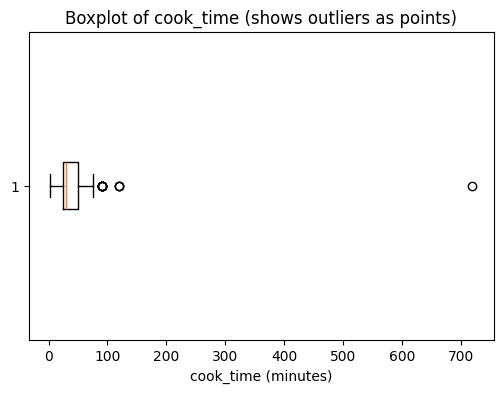

In [83]:
# C1 - Boxplot visualization using matplotlib (single column)
plt.figure(figsize=(6,4))
plt.boxplot(food_df['cook_time'].dropna(), vert=False)
plt.title('Boxplot of cook_time (shows outliers as points)')
plt.xlabel('cook_time (minutes)')
plt.show()


In [84]:
#Boxplot to see outliers in seaborn
# C2 - Boxplot by category (if you want to see distribution by Veg/Non veg)
if 'Veg/Non veg' in food_df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='cook_time', y='Veg/Non veg', data=food_df)
    plt.title('cook_time for food')
    plt.xlabel('cook_time (minutes)')
    plt.show()
else:
    print("Column 'Veg/Non veg' not found. Run single-column boxplot (Cell C1) instead.")


Column 'Veg/Non veg' not found. Run single-column boxplot (Cell C1) instead.


FINDING INCONSISTENT RECORDS

In [85]:


# 1) Negative values (not logical for food dataset)
num_cols = food_df.select_dtypes(include=['int64','float64']).columns
neg_values = food_df[num_cols][food_df[num_cols] < 0].dropna(how='all')

print("\nNegative Values Found:")
display(neg_values.head())




Negative Values Found:


,cook_time


In [86]:
# 2) Check inconsistent categories example (cuisine)
if "cuisine" in food_df.columns:
    display(food_df["cuisine"].value_counts())
    display(food_df["cuisine"].unique())
else:
    print("Column 'cuisine' not found.")

Column 'cuisine' not found.


In [87]:
if "Ingredients" in food_df.columns:
    display(food_df["Ingredients"].value_counts())
    display(food_df["Ingredients"].unique())
    display(food_df["Ingredients"].nunique())
else:
    print("Column 'cuisine' not found.")

Column 'cuisine' not found.


**✔ Derived metrics**

In [88]:
# Derived Metric 1: Length of dish name
food_df['name_length'] = food_df['food_name'].astype(str).apply(len)
food_df['name_word_count'] = food_df['food_name'].astype(str).apply(lambda x: len(x.split()))

print("Created: name_length, name_word_count")
food_df[['food_name', 'name_length', 'name_word_count']].head()

Created: name_length, name_word_count


,food_name,name_length,name_word_count
0,Balu shahi,10,2
1,Boondi,6,1
2,Gajar ka halwa,14,3
3,Ghevar,6,1
4,Gulab jamun,11,2


FEATURE ENGINEERING


In [89]:
# Feature Engineering Example for Food Dataset

# Introducing a new column: "Prep_Time_Category"
# to classify how long the dish takes to prepare

if 'cook_time' in food_df.columns:

    def categorize_prep_time(t):
        if t <= 20:
            return "Quick"
        elif t <= 45:
            return "Medium"
        else:
            return "Long"

    food_df['Prep_Time_Category'] = food_df['cook_time'].apply(categorize_prep_time)

    print("Created feature: Prep_Time_Category")
    display(food_df[['cook_time', 'Prep_Time_Category']].head())

else:
    print("Column 'cook_time' not found in your dataset.")


Created feature: Prep_Time_Category


,cook_time,Prep_Time_Category
0,25.0,Medium
1,30.0,Medium
2,60.0,Long
3,30.0,Medium
4,40.0,Medium


In [90]:

# 1. Create the Category Column

def categorize_prep_time(x):
    if x <= 20:
        return "Short"
    elif x <= 50:
        return "Medium"
    else:
        return "Long"

# Apply only if column exists
if 'cook_time' in food_df.columns:
    food_df['Prep_Time_Category'] = food_df['cook_time'].apply(categorize_prep_time)
    print("New Feature Prep Time has Created Successfully!")
else:
    print("ERROR: 'cook_time' column missing!")

# 2. Check Columns

print("\nAvailable Columns:")
print(food_df.columns.tolist())

# 3. Verify if column created

if 'Prep_Time_Category' in food_df.columns:
    print("\nUnique Categories:", food_df['Prep_Time_Category'].unique())
    print("Number of Categories:", food_df['Prep_Time_Category'].nunique())
else:
    print("\nColumn 'Prep_Time_Category' NOT FOUND")






New Feature Prep Time has Created Successfully!

Available Columns:
['food_name', 'ingredients', 'veg/non_veg', 'cook_time', 'flavor_profile', 'course', 'state', 'name_length', 'name_word_count', 'Prep_Time_Category']

Unique Categories: ['Medium' 'Long' 'Short']
Number of Categories: 3


# **DATA VISUALIZATON**

FILTERING

In [92]:
# Dishes that take less than 20 minutes
quick_dishes = food_df[food_df['cook_time'] < 20]
quick_dishes.head()

,food_name,ingredients,veg/non_veg,cook_time,flavor_profile,course,state,name_length,name_word_count,Prep_Time_Category
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,sweet,dessert,Punjab,5,1,Short
54,Kajjikaya,"Rice flour, jaggery, coconut",vegetarian,15.0,sweet,dessert,Andhra Pradesh,9,1,Short
60,Modak,"Rice flour, coconut, jaggery",vegetarian,15.0,sweet,dessert,Maharashtra,5,1,Short
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,15.0,spicy,main course,Nagaland,5,1,Short
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10.0,NaN,main course,Maharashtra,7,1,Short


In [93]:
veg_dishes = food_df[food_df['veg/non_veg'] == 'vegetarian']
veg_dishes.head()

,food_name,ingredients,veg/non_veg,cook_time,flavor_profile,course,state,name_length,name_word_count,Prep_Time_Category
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,25.0,sweet,dessert,West Bengal,10,2,Medium
1,Boondi,"Gram flour, ghee, sugar",vegetarian,30.0,sweet,dessert,Rajasthan,6,1,Medium
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60.0,sweet,dessert,Punjab,14,3,Long
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30.0,sweet,dessert,Rajasthan,6,1,Medium
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,40.0,sweet,dessert,West Bengal,11,2,Medium


# **STATISTICAL ANALYSIS**   
Apply statistical hypothesis testing to validate findings.

In [94]:
# ===== Descriptive Statistics =====

print("=== NUMERIC SUMMARY ===")
num_cols = food_df.select_dtypes(include=['int64','float64']).columns
display(food_df[num_cols].describe())

print("\n=== CATEGORICAL SUMMARY ===")
cat_cols = food_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(food_df[col].value_counts().head())


=== NUMERIC SUMMARY ===


,cook_time,name_length,name_word_count
count,154.000000,160.000000,160.000000
mean,43.422078,9.843750,1.631250
std,58.973549,4.101767,0.740745
min,2.000000,3.000000,1.000000
25%,25.000000,7.000000,1.000000
50%,30.000000,9.000000,2.000000
75%,50.000000,12.250000,2.000000
max,720.000000,28.000000,6.000000



=== CATEGORICAL SUMMARY ===

Column: food_name
food_name
Balu shahi        1
Boondi            1
Gajar ka halwa    1
Ghevar            1
Gulab jamun       1
Name: count, dtype: int64

Column: ingredients
ingredients
Gram flour, ghee, sugar                                                                           2
Chhena, sugar, ghee                                                                               2
Maida flour, yogurt, oil, sugar                                                                   1
Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom    1
Carrots, milk, sugar, ghee, cashews, raisins                                                      1
Name: count, dtype: int64

Column: veg/non_veg
veg/non_veg
vegetarian        147
non vegetarian     11
Name: count, dtype: int64

Column: flavor_profile
flavor_profile
spicy     76
sweet     70
bitter     2
Name: count, dtype: int64

Column: course
course
main course    75
dessert  

In [95]:
#Mean,Median & Mode

for col in num_cols:
    print(f"\nColumn: {col}")
    print("Mean   :", food_df[col].mean())
    print("Median :", food_df[col].median())
    print("Mode   :", food_df[col].mode()[0])



Column: cook_time
Mean   : 43.422077922077925
Median : 30.0
Mode   : 30.0

Column: name_length
Mean   : 9.84375
Median : 9.0
Mode   : 7

Column: name_word_count
Mean   : 1.63125
Median : 2.0
Mode   : 1


In [96]:
#Correlation Between Numeric Variables
corr_matrix = food_df[num_cols].corr()
display(corr_matrix)


,cook_time,name_length,name_word_count
cook_time,1.000000,-0.011323,-0.061976
name_length,-0.011323,1.000000,0.852373
name_word_count,-0.061976,0.852373,1.000000


# HYPOTHESIS TEST

# **F-test**

In [97]:
from scipy.stats import f_oneway

# Get unique states and create groups for cook_time
state_groups = []
for state in food_df['state'].unique():
    # Only include non-null states and drop NaN cook_time values
    cook_times_for_state = food_df[food_df['state'] == state]['cook_time'].dropna()
    if not cook_times_for_state.empty:
        state_groups.append(cook_times_for_state)

# Perform F-Test if there are enough groups
if len(state_groups) > 1:
    F_stat, p_val = f_oneway(*state_groups)

    print("F-TEST:", F_stat)
    print("P-value:", p_val)
else:
    print("Not enough groups with data to perform F-test.")

F-TEST: 0.4425909046519031
P-value: 0.9806795356952077


# **T-TEST**

In [98]:
#HYPOTHESIS TEST 1
#T-TEST: Compare Cook Time between Two Regions
from scipy.stats import ttest_ind

# Using 'state' column
# Choosing two states with sufficient data for comparison
group1 = food_df[food_df['state']=='Punjab']['cook_time'].dropna()
group2 = food_df[food_df['state']=='Maharashtra']['cook_time'].dropna()

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

print("=== T-TEST: Cook Time (Punjab vs Maharashtra) ===")
print("T-statistic:", t_stat)
print("P-value    :", p_val)


=== T-TEST: Cook Time (Punjab vs Maharashtra) ===
T-statistic: -0.9383049656369735
P-value    : 0.368101022704314


## **CHI-SQUARE TEST**

In [99]:
from scipy.stats import chi2_contingency

table = pd.crosstab(food_df['state'], food_df['flavor_profile'])
chi2, p, dof, expected = chi2_contingency(table)

print("=== CHI-SQUARE TEST: State ↔ Flavor Profile ===")
print("Chi-square:", chi2)
print("P-value   :", p)
print("Degrees of freedom:", dof)

=== CHI-SQUARE TEST: State ↔ Flavor Profile ===
Chi-square: 71.6540799825175
P-value   : 0.002925628092884168
Degrees of freedom: 42


# **DATA VISUALIZATION**

UNI VARIATE


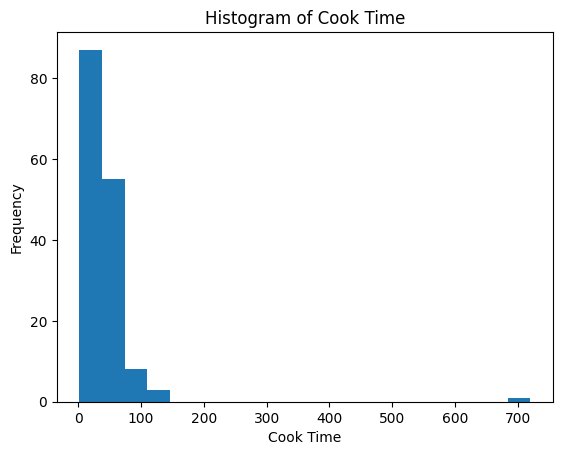

In [100]:
plt.hist(food_df['cook_time'].dropna(), bins=20)
plt.title("Histogram of Cook Time")
plt.xlabel("Cook Time")
plt.ylabel("Frequency")
plt.show()

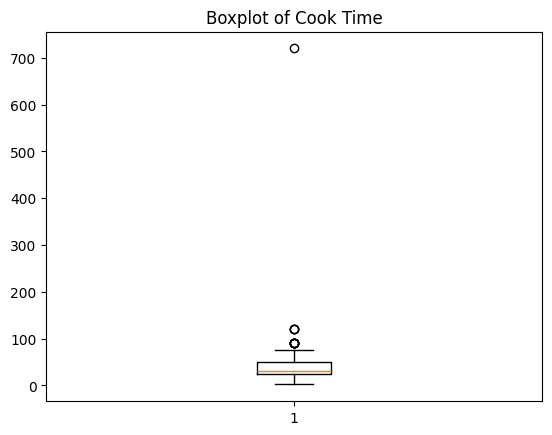

In [101]:
plt.boxplot(food_df['cook_time'].dropna())
plt.title("Boxplot of Cook Time")
plt.show()


BI-VARIATE

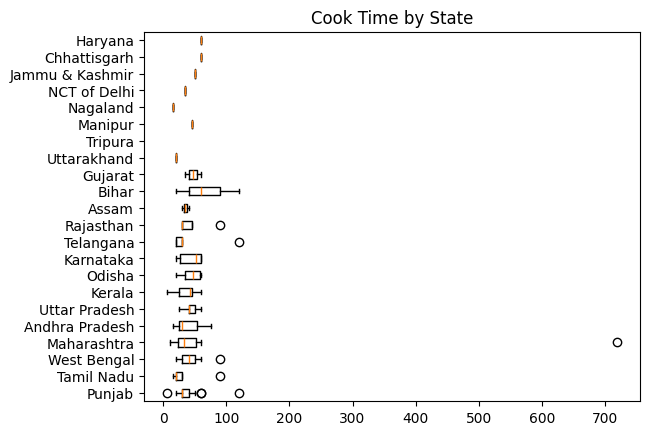

In [102]:
states = food_df['state'].value_counts().index.tolist()
data = [food_df[food_df['state'] == s]['cook_time'].dropna() for s in states]
plt.boxplot(data, labels=states, vert=False)
plt.title("Cook Time by State")
plt.show()

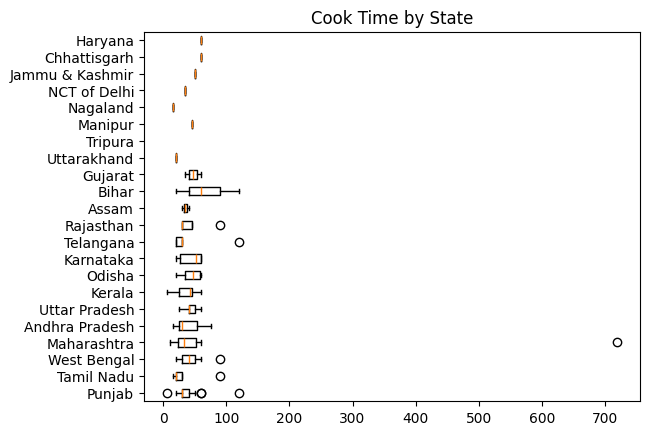

In [103]:
if 'state' in food_df.columns and 'cook_time' in food_df.columns:
    state_list = food_df['state'].value_counts().index.tolist()

    data = [food_df[food_df['state']==s]['cook_time'].dropna() for s in state_list]

    plt.boxplot(data, labels=state_list, vert=False)
    plt.title("Cook Time by State")
    plt.show()
else:
    print("Column missing for boxplot analysis")

**MULTIVARIATE ANALYSIS**

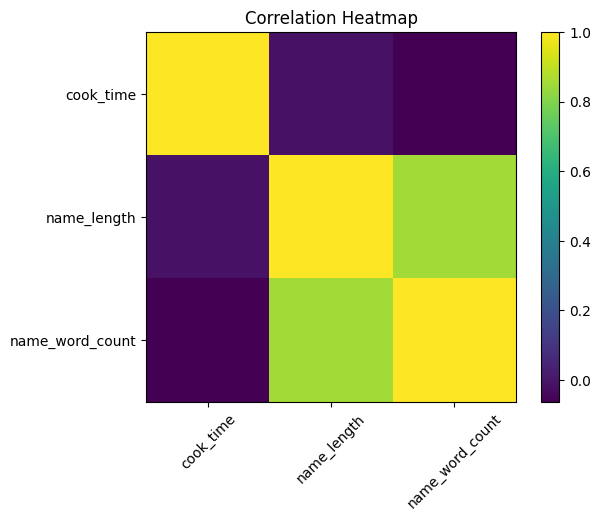

In [104]:
num_cols = food_df.select_dtypes(include=[np.number]).columns

corr = food_df[num_cols].corr()

plt.imshow(corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Multivariate (Scatter Matrix)
from pandas.plotting import scatter_matrix

# Select numerical columns that actually have data
# Assuming 'flavor_score' has been created on food_df elsewhere.
valid_num_cols = ['cook_time', 'name_length', 'flavor_score']

# Use the consistent DataFrame name 'food_df'
scatter_matrix(food_df[valid_num_cols], figsize=(10,8))
plt.suptitle("Scatter Matrix")
plt.show()

# **-------------ENDS---------------------**